In [1]:
# to import from parent directory
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from utils import load_obj
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [3]:
full = pd.read_csv('../normalised_growth.csv', index_col=0, header=[0], parse_dates=True)
full = full.loc["1960-01-01":]

In [4]:
length = len(full)
val_start = round(length * 0.8)
test_start = round(length * 0.9)    

In [27]:
test = full.iloc[test_start:]
# test = test[["CPIAUCSL", "A191RO1Q156NBEA", "UNRATE"]]
test.shape

(71, 32)

In [28]:
forecasts = []

forecasts.append(load_obj("One_Layer"))
forecasts.append(load_obj("Deep"))
forecasts.append(load_obj("LSTM"))
forecasts.append(load_obj("GRU"))
forecasts.append(load_obj("KR"))
forecasts.append(load_obj("FAVAR"))
forecasts.append(load_obj("testdata"))

In [29]:
# gotta match the indices

for i in range(len(forecasts)):
    forecasts[i] = pd.DataFrame(forecasts[i], index=test.iloc[test.shape[0]-len(forecasts[i]):].index, 
                                columns=["CPIAUCSL", "A191RO1Q156NBEA", "UNRATE"])


In [30]:
for i in forecasts:
    print(i.shape)

(70, 3)
(69, 3)
(70, 3)
(69, 3)
(70, 3)
(69, 3)
(71, 3)


In [31]:
# get the mean and std from preprocessed data

cpi = load_obj("cpi_mean_std")
gdp = load_obj("gdp_mean_std")
ue = load_obj("ue_mean_std")

In [32]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

def plot_series(var, mean_std):
    plt.figure(figsize=(16.5,11.7)) # a3 size

    for i in range(len(forecasts)-1):
        plt.plot((forecasts[i][var] * mean_std["std"]) + mean_std["mean"], linewidth = 2, linestyle='dashed')

    plt.plot((forecasts[i+1][var] * mean_std["std"]) + mean_std["mean"], linewidth=2, color='black')

    plt.legend(("One Layer", "Deep", "LSTM", "GRU", "Kernel Ridge", "FAVAR", "Actual"), facecolor="white")

    return plt

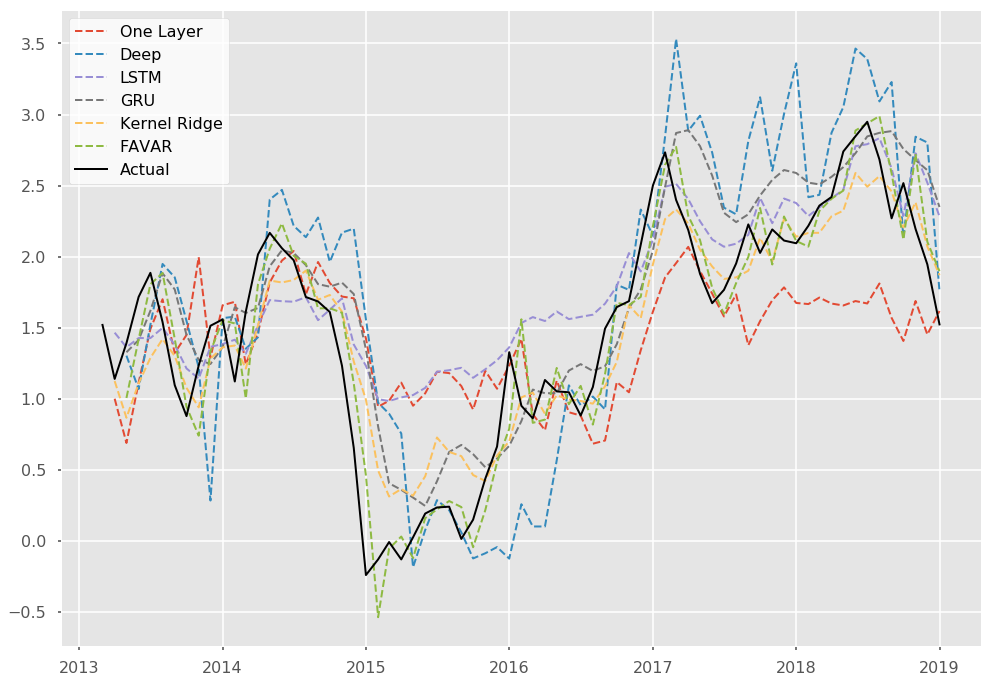

In [36]:
plot_series("CPIAUCSL", cpi).savefig('../Figs/forecasts_cpi_extended.png', bbox_inches='tight')

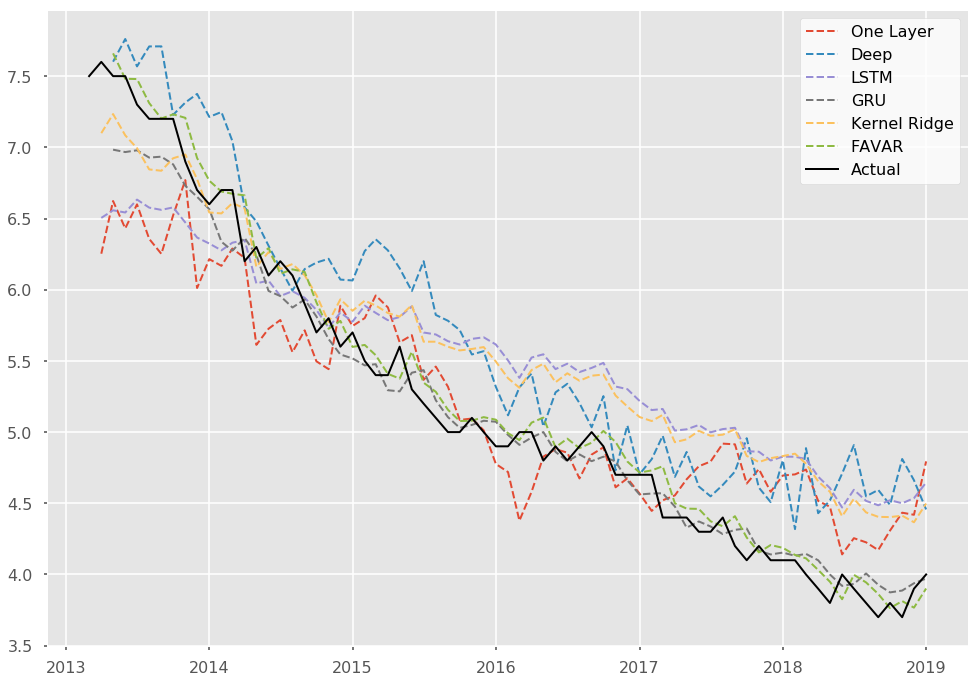

In [37]:
plot_series("UNRATE", ue).savefig('../Figs/forecasts_ue_extended.png', bbox_inches='tight')

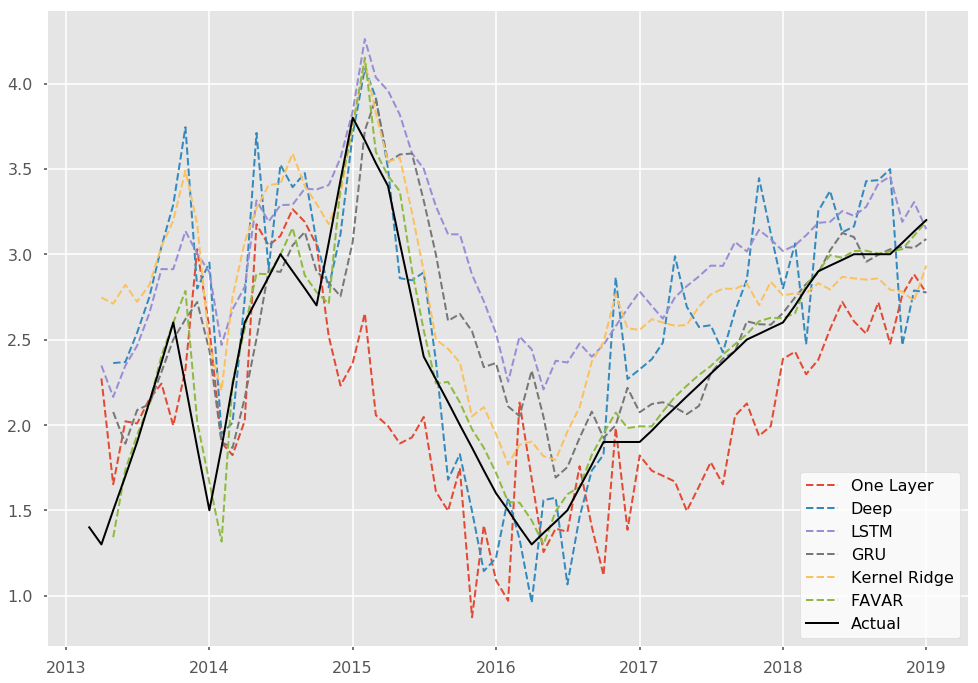

In [38]:
plot_series("A191RO1Q156NBEA", gdp).savefig('../Figs/forecasts_gdp_extended.png', bbox_inches='tight')